In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/My Drive/Colab Notebooks

/content/drive/My Drive/Colab Notebooks


In [3]:
import pandas as pd
import numpy as np
df = pd.read_csv('datasets/sms_spam_svm.csv')

In [9]:
y = df.iloc[:, 0].values
y = np.where(y == 'spam', -1, 1)

x = df.iloc[:, [1, 2]].values

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
         x, y, test_size=0.3, random_state=0)

In [12]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
/content/drive/My Drive/Colab Notebooks/defs.py:65: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  s=55, label='test set')


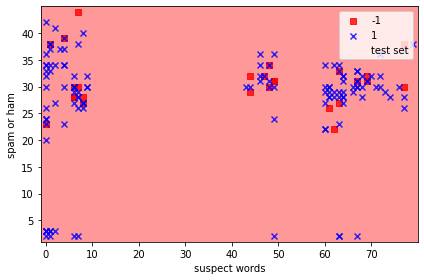

In [16]:
from defs import plot_decision_regions
import matplotlib.pyplot as plt
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined, y_combined,
                      classifier=svm, test_idx=range(-15, 15))
plt.xlabel('suspect words')
plt.ylabel('spam or ham')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

In [17]:
from sklearn.metrics import accuracy_score
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Misclassified samples: 7
Accuracy: 0.84




*   Content-based filtering. The approach consists of trying to identify the suspect keywords that are most commonly used in textual spam messages even within images; to this end, pattern recognition techniques leveraging optical character recognition (OCR) technology are implemented in order to extract text from images (This is the solution that Spam Assassin adopts)
*   Non content-based filtering. In this case, we try ti identify specific features of spam images (such as color features and so on), on the grounds that spam iamges being computer generated show different characteristics compared to natural images for the extraction of the features, we make use of advanced recognition techniques based on the neural networks and deep learning (DL)

